<a href="https://colab.research.google.com/github/Agil0509/Deep-Learning/blob/main/Introduction_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-09-09 12:09:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   134MB/s    in 0.8s    

2024-09-09 12:09:33 (134 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os

for dirpath,dirnames,filenames in os.walk('/content/pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in /content/pizza_steak.
There are 2 directories and 0 images in /content/pizza_steak/test.
There are 0 directories and 250 images in /content/pizza_steak/test/steak.
There are 0 directories and 250 images in /content/pizza_steak/test/pizza.
There are 2 directories and 0 images in /content/pizza_steak/train.
There are 0 directories and 750 images in /content/pizza_steak/train/steak.
There are 0 directories and 750 images in /content/pizza_steak/train/pizza.


In [ ]:
num_steak_images_train = len(os.listdir('/content/pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('p/content/pizza_steak/train')
data_dir

PosixPath('p/content/pizza_steak/train')

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

[]


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')

for item in data_dir.glob('*'):
  print(item,'       ', item.name)

pizza_steak/train/steak         steak
pizza_steak/train/pizza         pizza


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class #'pizza_steak/test/pizza'
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 512, 3)


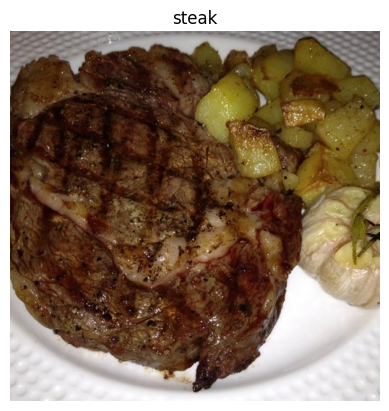

In [ ]:
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = 'steak')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           strides = 1,
                           padding = 'same',
                           kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'linear')
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model_1.fit(train_data,epochs = 5,
                      validation_data = valid_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 330ms/step - accuracy: 0.5378 - loss: 1.1714 - val_accuracy: 0.6620 - val_loss: 0.5354
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.7407 - loss: 0.4976 - val_accuracy: 0.7980 - val_loss: 0.4405
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.8225 - loss: 0.3908 - val_accuracy: 0.7600 - val_loss: 0.3950
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.8625 - loss: 0.3054 - val_accuracy: 0.8000 - val_loss: 0.5125
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.8706 - loss: 0.2858 - val_accuracy: 0.7580 - val_loss: 0.4298


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 107, 107, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model_2.fit(train_data,epochs = 5,
                      validation_data = valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.4993 - loss: 1.6143 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5047 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.4933 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.5084 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.5124 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model_3.fit(train_data,epochs = 5,
                      validation_data = valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.5455 - loss: 5.3976 - val_accuracy: 0.7100 - val_loss: 0.6919
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.7118 - loss: 0.6642 - val_accuracy: 0.7660 - val_loss: 0.5944
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.6871 - loss: 1.0069 - val_accuracy: 0.7860 - val_loss: 0.4641
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.6961 - loss: 0.7021 - val_accuracy: 0.7820 - val_loss: 0.4358
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.7889 - loss: 0.4679 - val_accuracy: 0.7860 - val_loss: 0.4619


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels = next(train_data)

In [ ]:
len(images), len(labels)

(32, 32)

In [ ]:
labels[0]

0.0

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model_4 = Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    Conv2D(filters = 100,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu'),
    Conv2D(100,3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(100,3,activation = 'relu'),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

In [ ]:
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = Adam(),
              metrics = ['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1166400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │       1,166,401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,349,401 (5.15 MB)

 Trainable params: 1,349,401 (5.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
            epochs = 5,
            validation_data = test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6084 - loss: 1.9213 - val_accuracy: 0.7740 - val_loss: 0.4631
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 323ms/step - accuracy: 0.7901 - loss: 0.4616 - val_accuracy: 0.7920 - val_loss: 0.4251
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 344ms/step - accuracy: 0.8215 - loss: 0.4387 - val_accuracy: 0.8560 - val_loss: 0.3574
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - accuracy: 0.8346 - loss: 0.3756 - val_accuracy: 0.8300 - val_loss: 0.3508
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 318ms/step - accuracy: 0.9059 - loss: 0.2591 - val_accuracy: 0.8340 - val_loss: 0.4268


In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.8290 - loss: 0.4641


[0.42683953046798706, 0.8339999914169312]

In [ ]:
history_4.history

{'accuracy': [0.6886666417121887,
  0.7839999794960022,
  0.8193333148956299,
  0.8420000076293945,
  0.9179999828338623],
 'loss': [0.9670857191085815,
  0.475532591342926,
  0.42679956555366516,
  0.360846608877182,
  0.23239031434059143],
 'val_accuracy': [0.7739999890327454,
  0.7919999957084656,
  0.8560000061988831,
  0.8299999833106995,
  0.8339999914169312],
 'val_loss': [0.46312960982322693,
  0.42507484555244446,
  0.357350617647171,
  0.3507697880268097,
  0.42683956027030945]}

<Axes: >

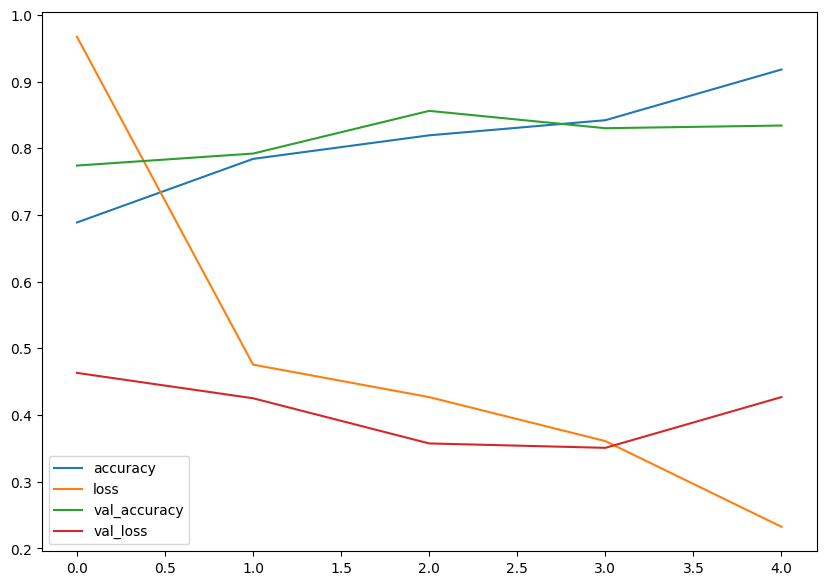

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [ ]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

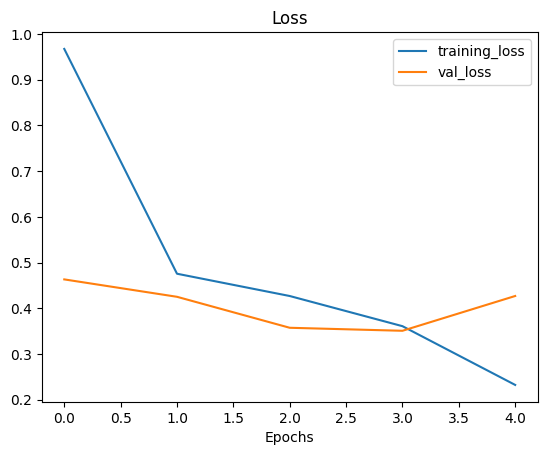

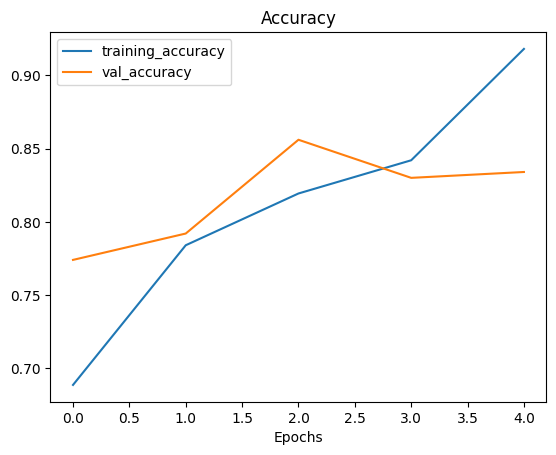

In [ ]:
plot_loss_curves(history_4)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model_5 = Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    Conv2D(filters = 100,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu'),
    Conv2D(100,3, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    MaxPool2D(pool_size = 2),
    Conv2D(100,3,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

In [ ]:
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = Adam(learning_rate = 0.0008),
              metrics = ['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
            epochs = 5,
            validation_data = test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 398ms/step - accuracy: 0.5583 - loss: 1.4676 - val_accuracy: 0.7620 - val_loss: 0.4943
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 338ms/step - accuracy: 0.7508 - loss: 0.5172 - val_accuracy: 0.7000 - val_loss: 0.5450
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 336ms/step - accuracy: 0.8011 - loss: 0.4632 - val_accuracy: 0.8020 - val_loss: 0.4488
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 341ms/step - accuracy: 0.8475 - loss: 0.3956 - val_accuracy: 0.8300 - val_loss: 0.3958
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 336ms/step - accuracy: 0.9176 - loss: 0.2246 - val_accuracy: 0.8460 - val_loss: 0.3760


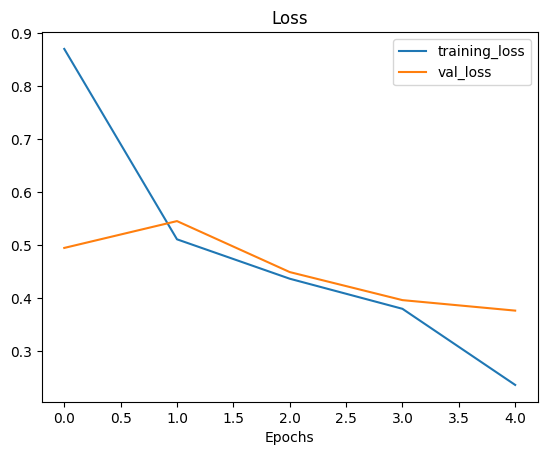

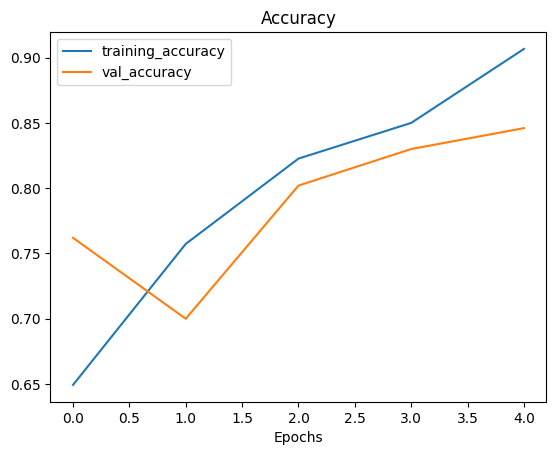

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Augamented dataset
train_datagen_augamented = ImageDataGenerator(rescale = 1/255,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip  = True)

# Normal dataset
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
print("Train data augamented:")
IMG_SIZE  = (224,224)
train_data_augamented = train_datagen_augamented.flow_from_directory(directory=train_dir,
                                                                     target_size = IMG_SIZE,
                                                                     class_mode = 'binary',
                                                                     batch_size = 32,
                                                                     shuffle = False)
print("Non-augamented train data:")
train_data =train_datagen.flow_from_directory(directory = train_dir,
                                              target_size = IMG_SIZE,
                                              class_mode = 'binary',
                                              batch_size = 32,
                                              shuffle = False)
print("Non-augamented test data:")
test_data =test_datagen.flow_from_directory(directory = test_dir,
                                              target_size = IMG_SIZE,
                                              class_mode = 'binary',
                                              batch_size = 32,
                                              shuffle = False)

Train data augamented:
Found 1500 images belonging to 2 classes.
Non-augamented train data:
Found 1500 images belonging to 2 classes.
Non-augamented test data:
Found 500 images belonging to 2 classes.


In [ ]:
images,labels = next(train_data)
augamented_images, augamented_labes = next(train_data_augamented)

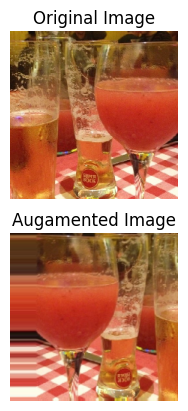

In [ ]:
import random

random_number = random.randint(1,31)
plt.subplot(2,1,1)
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(augamented_images[random_number])
plt.title('Augamented Image')
plt.axis(False);

In [ ]:
model_6 = Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])
model_6.fit(train_data_augamented,
            epochs = 5,
            validation_data = test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 511ms/step - accuracy: 0.3867 - loss: 0.8259 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 381ms/step - accuracy: 0.4611 - loss: 0.7203 - val_accuracy: 0.5920 - val_loss: 0.6832
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 398ms/step - accuracy: 0.5566 - loss: 0.6900 - val_accuracy: 0.6820 - val_loss: 0.6737
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 408ms/step - accuracy: 0.6648 - loss: 0.6604 - val_accuracy: 0.5680 - val_loss: 0.6589
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 496ms/step - accuracy: 0.6242 - loss: 0.6645 - val_accuracy: 0.8160 - val_loss: 0.5400


In [ ]:
print('Augamented and Shuffled train data')
train_data_augamented_and_shuffled = train_datagen_augamented.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode='binary'
)

Augamented and Shuffled train data
Found 1500 images belonging to 2 classes.


In [ ]:
model_8=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_8=model_8.fit(train_data_augamented_and_shuffled,epochs=5,validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 50s 795ms/step - accuracy: 0.5880 - loss: 1.1552 - val_accuracy: 0.6460 - val_loss: 0.6237
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 447ms/step - accuracy: 0.7431 - loss: 0.5286 - val_accuracy: 0.8260 - val_loss: 0.3767
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 457ms/step - accuracy: 0.7733 - loss: 0.4781 - val_accuracy: 0.8460 - val_loss: 0.3621
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 419ms/step - accuracy: 0.7925 - loss: 0.4617 - val_accuracy: 0.8480 - val_loss: 0.3717
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 525ms/step - accuracy: 0.8153 - loss: 0.4278 - val_accuracy: 0.8440 - val_loss: 0.3867


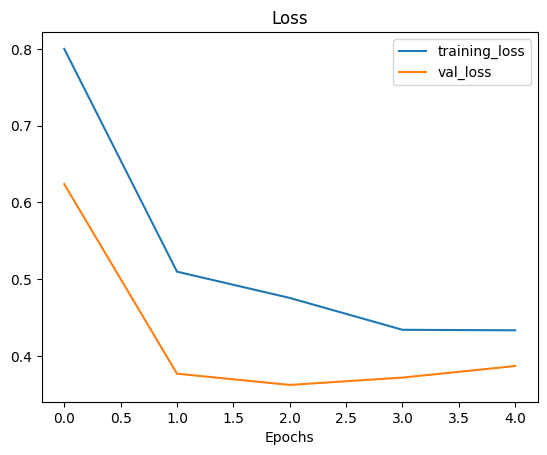

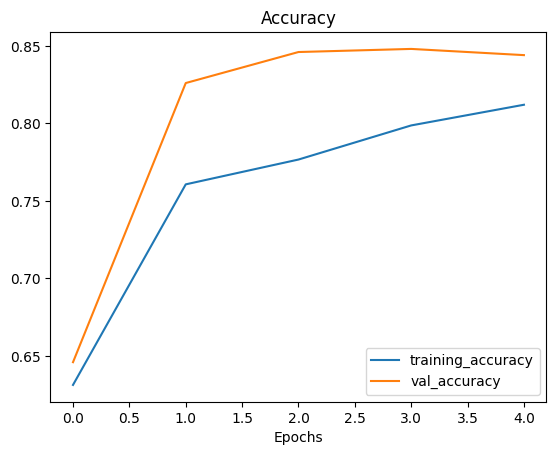

In [ ]:
plot_loss_curves(history_8)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-09-09 12:22:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.9MB/s    in 12s     

2024-09-09 12:23:09 (42.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
zip_ref = zipfile.ZipFile('/content/10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

for dirpath, dirname, filenames in os.walk('/content/10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 0 directories and 0 images in /content/10_food_classes_all_data.
There are 0 directories and 0 images in /content/10_food_classes_all_data/test.
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in /content/10_food_classes_all_data/test/chicken_wings.
There are 0 directories

In [ ]:
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names= np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              target_size = (224,224),
                                              class_mode = 'categorical',
                                              batch_size = 32,
                                              shuffle = False)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                              target_size = (224,224),
                                              class_mode = 'categorical',
                                              batch_size = 32,
                                              shuffle = False)

model_1_cat = Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax', kernel_initializer = 'glorot_uniform')])



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model_1_cat.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                    optimizer = tf.keras.optimizers.Nadam(),
                    metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'vall_los',mode = 'min',verbose = 1,patience = 2)
history_1_cat = model_1_cat.fit(train_data,epochs = 6, batch_size = 32,
                                validation_data = test_data,
                                callbacks = [es])

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 127ms/step - accuracy: 0.0967 - loss: 6.6794 - val_accuracy: 0.1124 - val_loss: 2.2975
Epoch 2/6


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `vall_los` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 136ms/step - accuracy: 0.1337 - loss: 2.2853 - val_accuracy: 0.1472 - val_loss: 2.2644
Epoch 3/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - accuracy: 0.2326 - loss: 2.1706 - val_accuracy: 0.1768 - val_loss: 2.2538
Epoch 4/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 132ms/step - accuracy: 0.3759 - loss: 1.9090 - val_accuracy: 0.1644 - val_loss: 2.5516
Epoch 5/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - accuracy: 0.4574 - loss: 1.6182 - val_accuracy: 0.1744 - val_loss: 2.7148
Epoch 6/6
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 125ms/step - accuracy: 0.6301 - loss: 1.1194 - val_accuracy: 0.1792 - val_loss: 3.5659


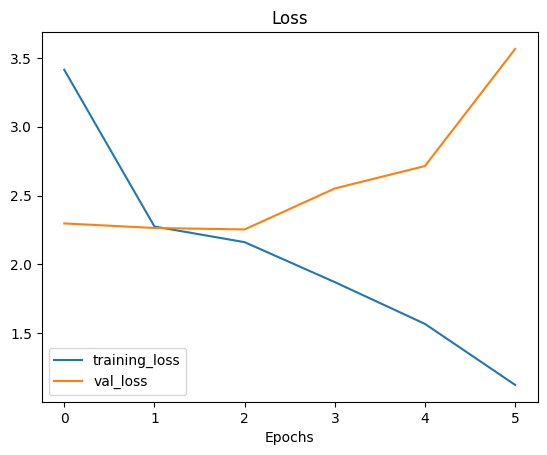

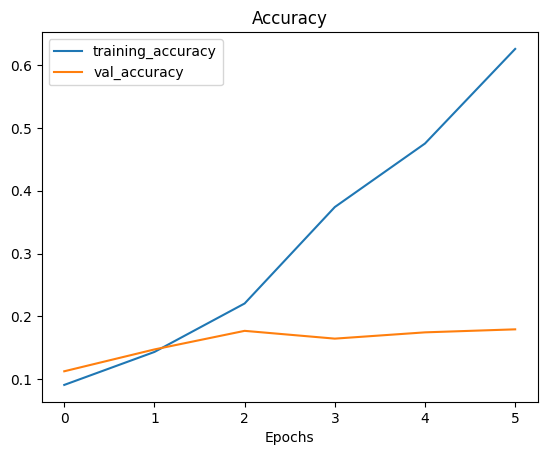

In [ ]:
plot_loss_curves(history_1_cat)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip  = True)


test_datagen = ImageDataGenerator(rescale = 1/255)

train_data_augamented = train_datagen.flow_from_directory(train_dir,
                                                          target_size = (224,224))
trest_data = test_datagen.flow_from_directory(test_dir,
                                              target_size = (224,224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Image shape: (512, 382, 3)


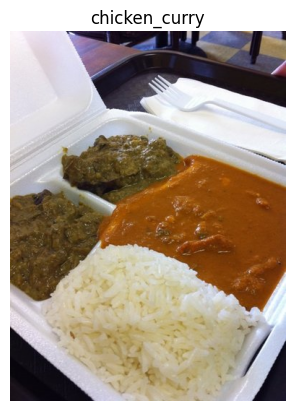

In [ ]:
img = view_random_image(target_dir = '/content/10_food_classes_all_data/train/',
                        target_class = 'chicken_curry')

In [ ]:
model_3_cat = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    tf.keras.layers.Conv2D(256,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(32,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax', kernel_initializer = 'glorot_uniform')])


In [ ]:
model_3_cat.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                    optimizer = tf.keras.optimizers.Nadam(),
                    metrics = ['accuracy'])

In [ ]:
history_3_cat = model_3_cat.fit(train_data_augamented,epochs = 6, batch_size = 32,
                                validation_data = test_data,
                                callbacks = [es])

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 16/235 ━━━━━━━━━━━━━━━━━━━━ 2:29 683ms/step - accuracy: 0.0991 - loss: 1.3243